In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
website = pd.read_csv('website.csv')

# Print the first five rows
print(website.head())

   time_seconds   age browser
0         486.0  47.1  Safari
1         645.7  64.6  Chrome
2         345.0  45.4  Safari
3         413.4  34.4  Chrome
4         426.4  31.3  Safari


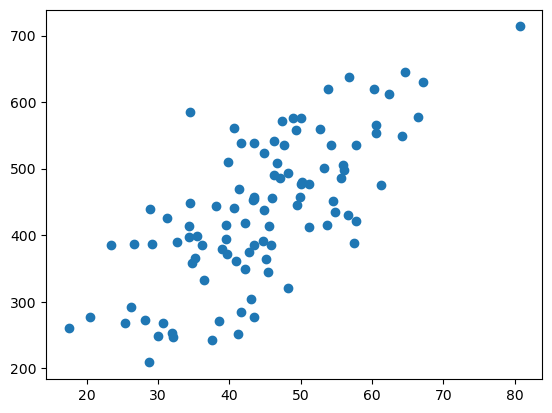

<Figure size 640x480 with 0 Axes>

In [3]:
# Create a scatter plot of time vs age
plt.scatter(website.age, website.time_seconds)

# Show then clear plot
plt.show()
plt.clf()

Intercept    128.967945
age            6.913758
dtype: float64


C:\Users\xre22\AppData\Local\Temp\ipykernel_12192\4174670877.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(website.age, results.params[0] + results.params[1]*website.age)


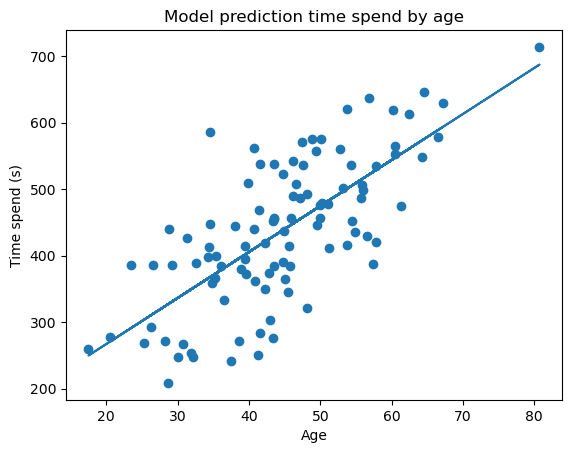

<Figure size 640x480 with 0 Axes>

In [8]:
# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('time_seconds ~ age', website)
results = model.fit()
print(results.params)

# Plot the scatter plot with the line on top
plt.scatter(website.age, website.time_seconds)
plt.plot(website.age, results.params[0] + results.params[1]*website.age)
plt.xlabel('Age')
plt.ylabel('Time spend (s)')
plt.title('Model prediction time spend by age')
# Show then clear plot
plt.show()
plt.clf()

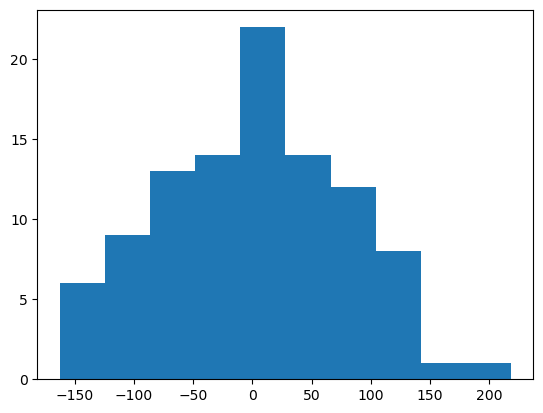

<Figure size 640x480 with 0 Axes>

In [5]:
# Calculate fitted values
fitted_values = results.predict(website)

# Calculate residuals
residuals = website.time_seconds - fitted_values

# Check normality assumption
plt.hist(residuals)

# Show then clear the plot
plt.show()
plt.clf()

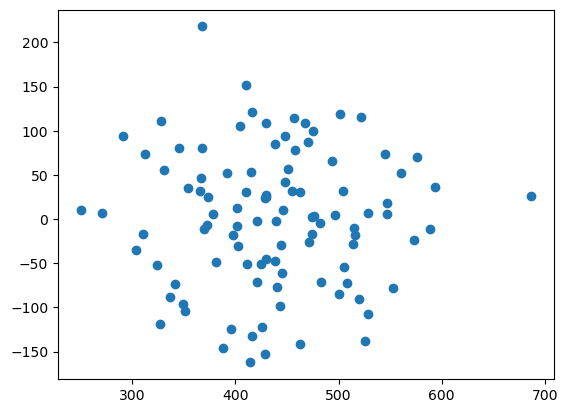

<Figure size 640x480 with 0 Axes>

In [6]:
# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)

# Show then clear the plot
plt.show()
plt.clf()

In [6]:
# Predict amount of time on website for 40 year old
pred40 = results.params[0] + results.params[1]*40
print('predicted time on website for a 40 year old: ', pred40)

# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('time_seconds ~ browser', website)
results = model.fit()
print(results.params)

# Calculate and print the group means (for comparison)
mean_time_chrome = np.mean(website.time_seconds[website.browser == 'Chrome'])
mean_time_safari = np.mean(website.time_seconds[website.browser == 'Safari'])
print('Mean time (Chrome): ', mean_time_chrome)
print('Mean time (Safari): ', mean_time_safari)
print('Mean time difference: ', mean_time_chrome - mean_time_safari)

predicted time on website for a 40 year old:  405.51824893244975
Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64
Mean time (Chrome):  489.70425531914884
Mean time (Safari):  390.64716981132074
Mean time difference:  99.0570855078281
